**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [65]:
# We start by importing our workbooks and packages
import examproblem2 as p2

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [3]:
# write your code here


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [4]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [5]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [6]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [7]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

## Question 1:

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [40]:
# We firstly set the baseline parameters
n = 0.5
w = 1

# We then set the values of k
k_values = [1, 2]

# We then, for each value of k, calculate the optimal l_t that maximizes profits
for k in k_values:
    optimal_l_t = p2.optimize_profit(k, n, w)
    print(f"For k = {k}, the optimal l_t that maximizes profits is: {optimal_l_t:.2f}")


For k = 1, the optimal l_t that maximizes profits is: 0.25
For k = 2, the optimal l_t that maximizes profits is: 1.00


By inserting k $\in$ {1, 2} as well as the parameters given in the text we see that the profit does maximize when labour is at the level of
$$l_t = \Bigg(\frac{(1-\eta)k_t}{w}\Bigg)^\frac{1}{\eta}$$
$$l_t = \Bigg(\frac{(1-0.5)*1}{1}\Bigg)^\frac{1}{0.5} = 0.25, \hspace{0.25cm} for \hspace{0.25cm} k=1$$
$$l_t = \Bigg(\frac{(1-0.5)*2}{1}\Bigg)^\frac{1}{0.5} = 1, \hspace{0.25cm} for \hspace{0.25cm} k=2$$
Meaning we have verified the found level of labour that maximizes profits.


## Question 2: 

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$

The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [63]:
# Firstly we set the baseline parameters
rho = 0.9
iota = 0.01
sigma_epsilon = 0.1
R = (1 + 0.01)**(1/12)
eta = 0.5
w = 1

# Then we set the planning horizon of 120 months equal to 10 years
T = 120

# Then we set K equal to 1000 to not affect our results too much
K = 1000

# Then we define the function that calculates the value of the ex ante value of the salon for each K
def calculate_h_2(shock_series):
    l_previous = 0
    h_value = 0

    for t in range(T):
        if t == 0:
            kappa_t = np.exp(shock_series[t])
        else:
            kappa_t = np.exp(rho * np.log(kappa_t) + shock_series[t])

        l_t = ((1 - eta) * kappa_t / w)**(1 / eta)
        adjustment_cost = 0 if l_t == l_previous else iota
        profit = kappa_t * l_t**(1 - eta) - w * l_t - adjustment_cost
        h_value += R**(-t) * profit
        l_previous = l_t

    return h_value

# Then we generate the shocks to the salon
np.random.seed(0)
shock_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, T))

# Then we calculate the average of H for all shock series
H = np.mean([calculate_h_2(shock_series[k]) for k in range(K)])

# Lastly we print the result
print(f"The approximate value of H with the updated policy is: {H:.2f}")

The approximate value of H with the updated policy is: 27.82


We have chosen a large K = 1000 so not to affect the results substantially. With this large K we end up with a ex ante expected value of the salon of 27.82.


## Question 3:


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.

Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?



In [60]:
# Firstly we set the baseline parameters
rho = 0.9
iota = 0.01
sigma_epsilon = 0.1
R = (1 + 0.01)**(1/12)
eta = 0.5
w = 1
delta = 0.05

# Then we set the planning horizon of 120 months equal to 10 years
T = 120

# Then we set K equal to 1000 to not affect our results too much
K = 1000

# Then we define the new function to calculate h for a given shock series but with the updated policy
def calculate_h_3(shock_series):
    l_previous = 0
    h_value = 0

    for t in range(T):
        if t == 0:
            kappa_t = np.exp(shock_series[t])
        else:
            kappa_t = np.exp(rho * np.log(kappa_t) + shock_series[t])

        l_star = ((1 - eta) * kappa_t / w)**(1 / eta)
        if abs(l_previous - l_star) > delta:
            l_t = l_star
        else:
            l_t = l_previous

        adjustment_cost = 0 if l_t == l_previous else iota
        profit = kappa_t * l_t**(1 - eta) - w * l_t - adjustment_cost
        h_value += R**(-t) * profit
        l_previous = l_t

    return h_value

# Then we again generate K random shock series
np.random.seed(0)
shock_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, T))

# Then we calculate the average of H by averaging for all shock series
H_new = np.mean([calculate_h_3(shock_series[k]) for k in range(K)])

# Lastly we print the result
print(f"The approximate value of H with the updated policy is: {H_new:.2f}")


The approximate value of H with the updated policy is: 28.50


We hereby see that including the new policy would improve the profitability as the ex ante expected value of the salon has increased from 27.82 to 28.50.

## Question 4:
Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

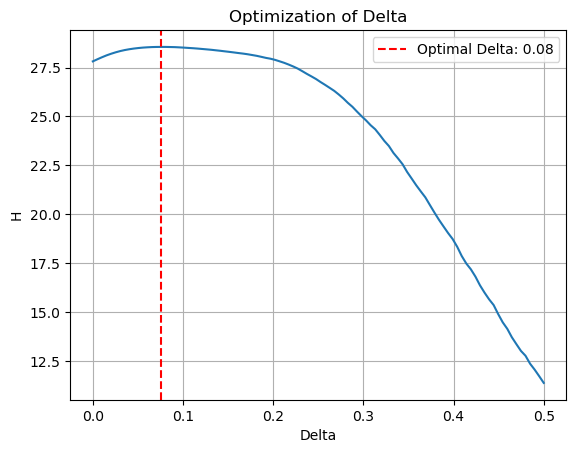

The optimal Delta value that maximizes H is: 0.08
The maximum value of H is: 28.56


In [66]:
# Firstly we set the baseline parameters
rho = 0.9
iota = 0.01
sigma_epsilon = 0.1
R = (1 + 0.01)**(1/12)
eta = 0.5
w = 1

# Then we set the planning horizon of 120 months equal to 10 years
T = 120

# Then we set K equal to 1000 to not affect our results too much
K = 1000

# We then again define the function to calculate h for a given shock series and delta
def calculate_h_4(shock_series, delta):
    l_previous = 0
    h_value = 0

    for t in range(T):
        if t == 0:
            kappa_t = np.exp(shock_series[t])
        else:
            kappa_t = np.exp(rho * np.log(kappa_t) + shock_series[t])

        l_star = ((1 - eta) * kappa_t / w)**(1 / eta)
        if abs(l_previous - l_star) > delta:
            l_t = l_star
        else:
            l_t = l_previous

        adjustment_cost = 0 if l_t == l_previous else iota
        profit = kappa_t * l_t**(1 - eta) - w * l_t - adjustment_cost
        h_value += R**(-t) * profit
        l_previous = l_t

    return h_value

# Then we generate K random shock series
np.random.seed(0)
shock_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, T))

# We then set the range of delta values to test upon
delta_values = np.linspace(0, 0.5, 100)

# Then we calculate H for each delta value
H_values = []
for delta in delta_values:
    H = np.mean([calculate_h_4(shock_series[k], delta) for k in range(K)])
    H_values.append(H)

# We then find the optimal delta value of the ones we tested
optimal_delta = delta_values[np.argmax(H_values)]
max_H = np.max(H_values)

# Lastly we plot the results to find the optimal delta value
plt.plot(delta_values, H_values)
plt.axvline(x=optimal_delta, color='r', linestyle='--', label=f'Optimal Delta: {optimal_delta:.2f}')
plt.xlabel('Delta')
plt.ylabel('H')
plt.title('Optimization of Delta')
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal Delta value that maximizes H is: {optimal_delta:.2f}")
print(f"The maximum value of H is: {max_H:.2f}")


We hereby see that the optimal Delta value that maximizes H is 0.08 which increases the ex ante expected value of the salon to 28.55 from 28.50 that we saw when delta was 0.05.


## Question 5:
Suggest an alternative policy you believe might improve profitability. Implement and test your policy.


To potentially improve the profitability of the salon we could try the alternative policy of a dynamic pricing strategy based on the demand conditions. The salon can now adjust the price based on the current level of demand instead of a fixed price for haircuts. 

The policy can be updated as follows:

- As before we calculate the demand shock $\kappa_t$ using the AR(1) process.
- Using the previous formula we will calculate the optimal level of employment $\ell_t$: $\ell_t = \left(\frac{(1-\eta)\kappa_t}{w}\right)^{\frac{1}{\eta}}$.
- Using a new price function, we can calculate the price $p_t$ based on the demand and the current level of employment. For simplicity sake, we will use a simple linear pricing function: $p_t = a - b \cdot \ell_t$, where $a$ and $b$ are positive constants.
- By inverting the pricing function and solving for $\ell_t$ we can determine the actual level of employment $\ell_t$: $\ell_t = \left(\frac{a - p_t}{b}\right)^{\frac{1}{\eta}}$.
- If the absolute difference between the previous and optimal levels of employment optimal level of employment is greater than a certain threshold ($\Delta$), we update the employment level to the optimal level. If not keep the employment level unchanged.
- We can then calculate the profit using the new employment level and the new price.
- To implment this alternativ policy it requires a new script. The modified script can be found below with the corresponding ex ante expected value of the salon.

In [67]:
# Firstly we set the baseline parameters (We define the constants a and b here for the pricing function)
rho = 0.9
iota = 0.01
sigma_epsilon = 0.1
R = (1 + 0.01)**(1/12)
eta = 0.5
w = 1
delta = 0.05
a = 2  # The a constant for the pricing function
b = 0.5  # The b constant for the pricing function

# Then we set the planning horizon of 120 months equal to 10 years
T = 120

# Then we set K equal to 1000 to not affect our results too much
K = 1000

# We then define the function to calculate h for a given shock series
def calculate_h(shock_series):
    l_previous = 0
    h_value = 0

    for t in range(T):
        if t == 0:
            kappa_t = np.exp(shock_series[t])
        else:
            kappa_t = np.exp(rho * np.log(kappa_t) + shock_series[t])

        l_star = ((1 - eta) * kappa_t / w)**(1 / eta)
        p_t = a - b * l_star
        l_t = ((a - p_t) / b)**(1 / eta) if abs(l_previous - l_star) > delta else l_previous

        adjustment_cost = 0 if l_t == l_previous else iota
        profit = p_t * l_t**(1 - eta) - w * l_t - adjustment_cost
        h_value += R**(-t) * profit
        l_previous = l_t

    return h_value

# We then generate K random shock series
np.random.seed(0)
shock_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, size=(K, T))

# We then calculate H for the alternative policy we've implemented
H = np.mean([calculate_h(shock_series[k]) for k in range(K)])

# Lastly we print the approximate value of H for the alternative policy
print(f"The approximate value of H for the alternative policy is: {H:.2f}")


The approximate value of H for the alternative policy is: 43.47


By implementing this new solution we can increase our ex ante expected value of the salon to 43.47 from 28.55, meaning we have increased our ex ante expected value of the salon by 52.2%.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [71]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

## Question 1: 
Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

Optimal solution:
x1 = -0.0000
x2 = -0.0000


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

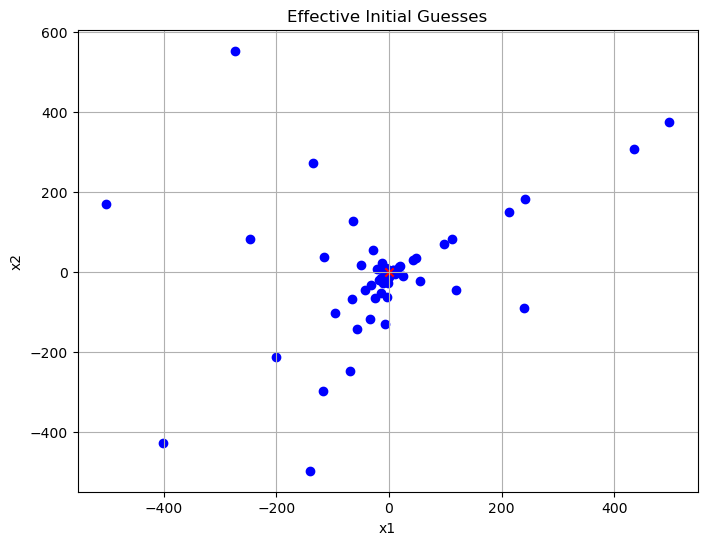

In [74]:
# We firstly define the Griewank function
def griewank(x):
    n = len(x)
    sum_term = np.sum(x**2 / 4000)
    prod_term = np.prod(np.cos(x / np.sqrt(np.arange(1, n + 1))))
    return sum_term - prod_term + 1

# Refined global optimizer with multi-start
def refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations):
    x_star = np.zeros(len(bounds))  # Initialize x_star as a zero vector
    f_star = np.inf

    for k in range(max_iterations):
        # Step 3.A: Draw random x^k uniformly within chosen bounds
        x_k = np.random.uniform(bounds[:, 0], bounds[:, 1])

        if k >= warmup_iterations:
            # Step 3.C: Calculate chi^k
            chi_k = 0.5 * 2 / (1 + np.exp((k - warmup_iterations) / 100))

            # Step 3.D: Calculate x_k0
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star

            # Step 3.E: Run optimizer with x_k0 as initial guess
            res = minimize(griewank, x_k0, method='BFGS', tol=tolerance)
            x_k_star = res.x
            f_k_star = res.fun

            # Step 3.F: Update x_star and f_star
            if k == warmup_iterations or f_k_star < f_star:
                x_star = x_k_star
                f_star = f_k_star

        # Step 3.G: Check if f_star is below tolerance
        if f_star < tolerance:
            break

    return x_star

# Set the parameters and bounds
bounds = np.array([[-600, 600], [-600, 600]])
tolerance = 1e-8
warmup_iterations = 10
max_iterations = 1000

# Run the refined global optimizer
x_star = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)

# Print the optimal solution
print("Optimal solution:")
print(f"x1 = {x_star[0]:.4f}")
print(f"x2 = {x_star[1]:.4f}")

# Plotting the effective initial guesses x_k0
effective_initial_guesses = []

for k in range(max_iterations):
    if k < warmup_iterations:
        effective_initial_guesses.append(np.random.uniform(bounds[:, 0], bounds[:, 1]))
    else:
        chi_k = 0.5 * 2 / (1 + np.exp((k - warmup_iterations) / 100))
        x_k0 = chi_k * effective_initial_guesses[k-warmup_iterations] + (1 - chi_k) * x_star
        effective_initial_guesses.append(x_k0)

# Convert the list to a numpy array for plotting
effective_initial_guesses = np.array(effective_initial_guesses)

# Plotting the effective initial guesses
plt.figure(figsize=(8, 6))
plt.scatter(effective_initial_guesses[:, 0], effective_initial_guesses[:, 1], c='b', marker='o')
plt.scatter(x_star[0], x_star[1], c='r', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Effective Initial Guesses')
plt.grid(True)
plt.plot


## Question 2:
Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

Optimal solution:
x1 = -0.0000
x2 = -0.0000


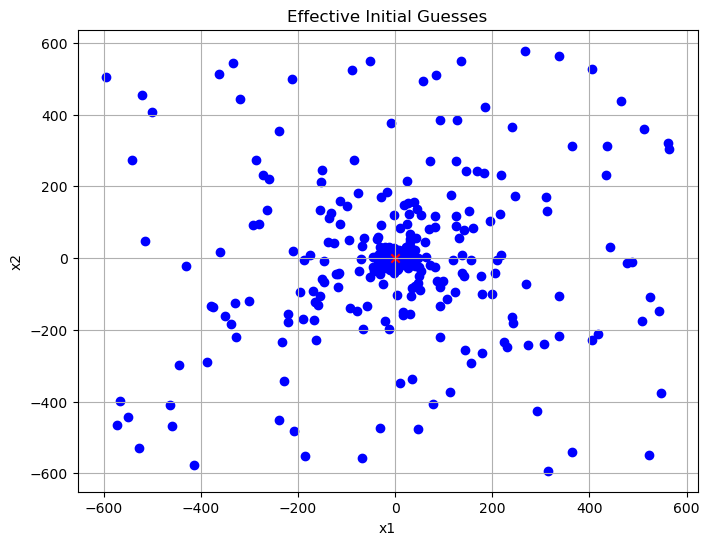

In [70]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Griewank function
def griewank(x):
    n = len(x)
    sum_term = np.sum(x**2 / 4000)
    prod_term = np.prod(np.cos(x / np.sqrt(np.arange(1, n + 1))))
    return sum_term - prod_term + 1

# Refined global optimizer with multi-start
def refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations):
    x_star = np.zeros(len(bounds))  # Initialize x_star as a zero vector
    f_star = np.inf

    for k in range(max_iterations):
        # Step 3.A: Draw random x^k uniformly within chosen bounds
        x_k = np.random.uniform(bounds[:, 0], bounds[:, 1])

        if k >= warmup_iterations:
            # Step 3.C: Calculate chi^k
            chi_k = 0.5 * 2 / (1 + np.exp((k - warmup_iterations) / 100))

            # Step 3.D: Calculate x_k0
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star

            # Step 3.E: Run optimizer with x_k0 as initial guess
            res = minimize(griewank, x_k0, method='BFGS', tol=tolerance)
            x_k_star = res.x
            f_k_star = res.fun

            # Step 3.F: Update x_star and f_star
            if k == warmup_iterations or f_k_star < f_star:
                x_star = x_k_star
                f_star = f_k_star

        # Step 3.G: Check if f_star is below tolerance
        if f_star < tolerance:
            break

    return x_star

# Set the parameters and bounds
bounds = np.array([[-600, 600], [-600, 600]])
tolerance = 1e-8
warmup_iterations = 100  # Modified value: warmup_iterations = 100
max_iterations = 1000

# Run the refined global optimizer
x_star = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)

# Print the optimal solution
print("Optimal solution:")
print(f"x1 = {x_star[0]:.4f}")
print(f"x2 = {x_star[1]:.4f}")

# Plotting the effective initial guesses x_k0
effective_initial_guesses = []

for k in range(max_iterations):
    if k < warmup_iterations:
        effective_initial_guesses.append(np.random.uniform(bounds[:, 0], bounds[:, 1]))
    else:
        chi_k = 0.5 * 2 / (1 + np.exp((k - warmup_iterations) / 100))
        x_k0 = chi_k * effective_initial_guesses[k-warmup_iterations] + (1 - chi_k) * x_star
        effective_initial_guesses.append(x_k0)

# Convert the list to a numpy array for plotting
effective_initial_guesses = np.array(effective_initial_guesses)

# Plotting the effective initial guesses
plt.figure(figsize=(8, 6))
plt.scatter(effective_initial_guesses[:, 0], effective_initial_guesses[:, 1], c='b', marker='o')
plt.scatter(x_star[0], x_star[1], c='r', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Effective Initial Guesses')
plt.grid(True)
plt.show()


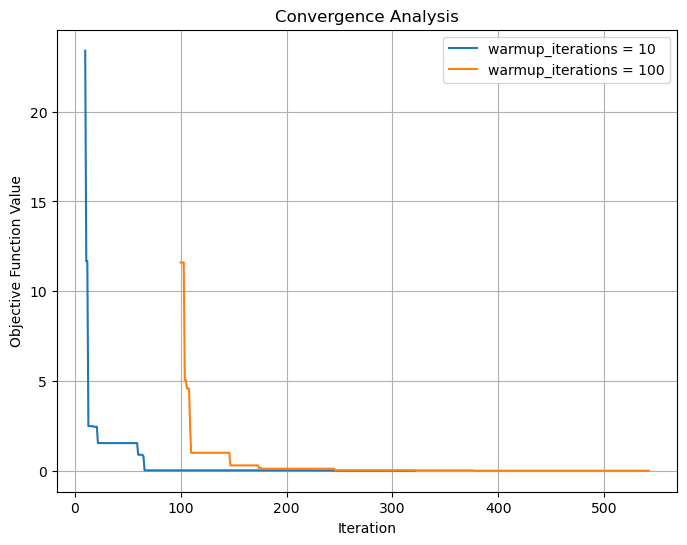

In [79]:
# Set the parameters and bounds
bounds = np.array([[-600, 600], [-600, 600]])
tolerance = 1e-8
warmup_iterations_10 = 10
warmup_iterations_100 = 100
max_iterations = 1000

# Run the refined global optimizer with different values of warmup_iterations
x_star_10, objective_values_10 = refined_global_optimizer(bounds, tolerance, warmup_iterations_10, max_iterations)
x_star_100, objective_values_100 = refined_global_optimizer(bounds, tolerance, warmup_iterations_100, max_iterations)

# Plotting the objective function values
plt.figure(figsize=(8, 6))
plt.plot(objective_values_10, label='warmup_iterations = 10')
plt.plot(objective_values_100, label='warmup_iterations = 100')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Convergence Analysis')
plt.legend()
plt.grid(True)
plt.show()
